In [2]:
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname ="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc('font',family=font_name)
mlp.rcParams['axes.unicode_minus']=False

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from tqdm.notebook import tqdm

# 기준금리표

In [16]:
# 파일 불러오기
seoul_rate = pd.read_csv("C:\\hojun13\\Pythonwork\\Analysis\\Data\\data\\부동산 파일\\프로젝트\\한국은행 기준금리 및 여수신금리_08091655.csv", encoding='utf-8')
seoul_rate

,통계표,계정항목,단위,변환,2022,2021,2020,2019,2018,2017
0,1.3.1. 한국은행 기준금리 및 여수신금리,한국은행 기준금리,연%,원자료,3.25,1.0,0.5,1.25,1.75,1.5
1,1.3.1. 한국은행 기준금리 및 여수신금리,한국은행 기준금리,%,전년말대비증감률,225.00,100.0,-60.0,-28.60,16.70,20.0


In [17]:
# 계정항목 정리하기
seoul_rate=seoul_rate[['계정항목', '단위', '변환', '2022', '2021', '2020', '2019', '2018', '2017']]

In [18]:
#계정항목 인덱스 설정하기
seoul_rate.set_index('계정항목',inplace=True)
seoul_rate

,단위,변환,2022,2021,2020,2019,2018,2017
계정항목,,,,,,,,
한국은행 기준금리,연%,원자료,3.25,1.0,0.5,1.25,1.75,1.5
한국은행 기준금리,%,전년말대비증감률,225.00,100.0,-60.0,-28.60,16.70,20.0


In [19]:
# 행과 열 바꾸기
seoul_rate = seoul_rate.T

In [20]:
# 컬럼 이름 바꾸기
seoul_rate.rename(columns={'한국은행 기준금리' : '기준금리'},inplace=True)
seoul_rate

계정항목,기준금리,기준금리
단위,연%,%
변환,원자료,전년말대비증감률
2022,3.25,225.0
2021,1.0,100.0
2020,0.5,-60.0
2019,1.25,-28.6
2018,1.75,16.7
2017,1.5,20.0


In [25]:
# 이름이 같은 컬럼의 이름 변경하기
seoul_rate.columns.values[1] ='기준금리 변동률(%)'

In [22]:
#필요없는 행 지우기
seoul_rate.drop(seoul_rate.index[0], inplace=True)
seoul_rate

계정항목,기준금리,기준금리 변동률(%)
변환,원자료,전년말대비증감률
2022,3.25,225.0
2021,1.0,100.0
2020,0.5,-60.0
2019,1.25,-28.6
2018,1.75,16.7
2017,1.5,20.0


In [26]:
#필요없는 행 지우기
seoul_rate.drop(seoul_rate.index[0], inplace=True)

In [27]:
seoul_rate

계정항목,기준금리,기준금리 변동률(%)
2022,3.25,225.0
2021,1.0,100.0
2020,0.5,-60.0
2019,1.25,-28.6
2018,1.75,16.7
2017,1.5,20.0


In [29]:
seoul_rate.reset_index(inplace=True)

In [30]:
seoul_rate

계정항목,index,기준금리,기준금리 변동률(%)
0,2022,3.25,225.0
1,2021,1.0,100.0
2,2020,0.5,-60.0
3,2019,1.25,-28.6
4,2018,1.75,16.7
5,2017,1.5,20.0


In [31]:
# 데이터타입 바꾸기(정수형, 실수형으로)
seoul_rate['기준금리'] = pd.to_numeric(seoul_rate['기준금리'])
seoul_rate['기준금리 변동률(%)'] = pd.to_numeric(seoul_rate['기준금리 변동률(%)'])

In [32]:
seoul_rate.rename(columns={"index" : "연도"},inplace=True)

In [33]:
seoul_rate.set_index('연도', inplace=True)

In [34]:
seoul_rate.columns

Index(['기준금리', '기준금리 변동률(%)'], dtype='object', name='계정항목')

In [39]:
seoul_rate.reset_index()

계정항목,연도,기준금리,기준금리 변동률(%)
0,2022,3.25,225.0
1,2021,1.00,100.0
2,2020,0.50,-60.0
3,2019,1.25,-28.6
4,2018,1.75,16.7
5,2017,1.50,20.0


In [18]:
seoul_rate.to_csv("C:\\hojun13\\Pythonwork\\Analysis\\Data\\data\\부동산 파일\\프로젝트\\연도별 금리 최종본.csv", encoding='utf-8')

# GDP표

In [4]:
# 파일 불러오기
seoul_GDP = pd.read_csv("C:\\hojun13\\Pythonwork\\Analysis\\Data\\data\\부동산 파일\\프로젝트\\국내총생산에 대한 지출(원계열, 명목, 분기 및 연간)_08104348.csv", encoding='utf-8')
seoul_GDP

,통계표,계정항목,단위,변환,2022,2021,2020,2019,2018,2017
0,"2.1.2.2.3. 국내총생산에 대한 지출(원계열, 명목, 분기 및 연간)",국내총생산에 대한 지출,십억원,원자료,"2,150,575.8","2,071,658","1,940,726.2","1,924,498.1","1,898,192.6","1,835,698.2"
1,"2.1.2.2.3. 국내총생산에 대한 지출(원계열, 명목, 분기 및 연간)",국내총생산에 대한 지출,%,전년말대비증감률,3.8,6.7,0.8,1.4,3.4,5.5


In [5]:
# 원하는 컬럼만 가져오기
seoul_GDP=seoul_GDP[['계정항목', '단위', '변환', '2022', '2021', '2020', '2019', '2018', '2017']]
seoul_GDP

,계정항목,단위,변환,2022,2021,2020,2019,2018,2017
0,국내총생산에 대한 지출,십억원,원자료,"2,150,575.8","2,071,658","1,940,726.2","1,924,498.1","1,898,192.6","1,835,698.2"
1,국내총생산에 대한 지출,%,전년말대비증감률,3.8,6.7,0.8,1.4,3.4,5.5


In [6]:
# 인덱스 설정하기
seoul_GDP.set_index('계정항목', inplace= True)
seoul_GDP

,단위,변환,2022,2021,2020,2019,2018,2017
계정항목,,,,,,,,
국내총생산에 대한 지출,십억원,원자료,"2,150,575.8","2,071,658","1,940,726.2","1,924,498.1","1,898,192.6","1,835,698.2"
국내총생산에 대한 지출,%,전년말대비증감률,3.8,6.7,0.8,1.4,3.4,5.5


In [7]:
# 행과열 바꾸기
seoul_GDP = seoul_GDP.T
seoul_GDP

계정항목,국내총생산에 대한 지출,국내총생산에 대한 지출
단위,십억원,%
변환,원자료,전년말대비증감률
2022,"2,150,575.8",3.8
2021,"2,071,658",6.7
2020,"1,940,726.2",0.8
2019,"1,924,498.1",1.4
2018,"1,898,192.6",3.4
2017,"1,835,698.2",5.5


In [8]:
# 컬럼 이름 변경하기
seoul_GDP.rename(columns={'국내총생산에 대한 지출': 'GDP(십억원)'}, inplace=True)

In [9]:
#필요없는 행 삭제하기
seoul_GDP.drop(seoul_GDP.index[0], inplace=True)
seoul_GDP

계정항목,GDP(십억원),GDP(십억원)
변환,원자료,전년말대비증감률
2022,"2,150,575.8",3.8
2021,"2,071,658",6.7
2020,"1,940,726.2",0.8
2019,"1,924,498.1",1.4
2018,"1,898,192.6",3.4
2017,"1,835,698.2",5.5


In [10]:
#필요없는 행 삭제하기
seoul_GDP.drop(seoul_GDP.index[0], inplace=True)

In [11]:
# 이름 같은 컬럼 변경하기
seoul_GDP.columns.values[1] ='GDP 변동률(%)'

In [12]:
seoul_GDP.reset_index(inplace=True)

In [13]:
seoul_GDP

계정항목,index,GDP(십억원),GDP 변동률(%)
0,2022,"2,150,575.8",3.8
1,2021,"2,071,658",6.7
2,2020,"1,940,726.2",0.8
3,2019,"1,924,498.1",1.4
4,2018,"1,898,192.6",3.4
5,2017,"1,835,698.2",5.5


In [14]:
#데이터 타입 변경하기
seoul_GDP['GDP(십억원)'] =pd.to_numeric(seoul_GDP['GDP(십억원)'].str.replace(",", "").astype(float))
seoul_GDP['GDP 변동률(%)'] = pd.to_numeric(seoul_GDP['GDP 변동률(%)'])

In [15]:
seoul_GDP.rename(columns={'index' : '연도'}, inplace=True)

In [67]:
seoul_GDP.set_index("연도", inplace=True)

In [16]:
seoul_GDP

계정항목,연도,GDP(십억원),GDP 변동률(%)
0,2022,2150575.8,3.8
1,2021,2071658.0,6.7
2,2020,1940726.2,0.8
3,2019,1924498.1,1.4
4,2018,1898192.6,3.4
5,2017,1835698.2,5.5


In [18]:
seoul_GDP.to_csv("C:\\hojun13\\Pythonwork\\Analysis\\Data\\data\\부동산 파일\\프로젝트\\연도별 GDP 최종본.csv", encoding='utf-8')

# GDP, 금리 합치기

In [69]:
# 머지하기
seoul_finance = pd.concat([seoul_rate, seoul_GDP], axis=1)
seoul_finance

계정항목,기준금리,기준금리 변동률(%),GDP(십억원),GDP 변동률(%)
연도,,,,
2022,3.25,225.0,2150575.8,3.8
2021,1.00,100.0,2071658.0,6.7
2020,0.50,-60.0,1940726.2,0.8
2019,1.25,-28.6,1924498.1,1.4
2018,1.75,16.7,1898192.6,3.4
2017,1.50,20.0,1835698.2,5.5


In [39]:
seoul_finance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 2022 to 2017
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준금리         6 non-null      float64
 1   기준금리 변동률(%)  6 non-null      float64
 2   GDP          6 non-null      float64
 3   GDP 변동률(%)   6 non-null      float64
dtypes: float64(4)
memory usage: 240.0+ bytes


In [40]:
#파일로 저장하기
seoul_finance.to_csv("C:\\hojun13\\Pythonwork\\Analysis\\Data\\data\\부동산 파일\\프로젝트\\금리와 GDP결합 최종본.csv", encoding='utf-8')

# 물가 표

In [106]:
#파일 불러오기
seoul_price = pd.read_csv("C:\\hojun13\\Pythonwork\\Analysis\\Data\\data\\부동산 파일\\프로젝트\\소비자물가지수_08104616.csv", encoding='utf-8')
seoul_price

,통계표,계정항목,단위,가중치,변환,2022,2021,2020,2019,2018,2017
0,4.2.1. 소비자물가지수,총지수,2020=100,1000,원자료,107.71,102.5,100.0,99.466,99.086,97.645
1,4.2.1. 소비자물가지수,총지수,%,1000,전년말대비증감률,5.10,2.5,0.5,0.400,1.500,1.900


In [107]:
#필요한 컬럼 가져오기
seoul_price=seoul_price[['계정항목', '변환', '2022', '2021', '2020', '2019', '2018', '2017']]

In [108]:
# 인덱스 설정하기
seoul_price.set_index('계정항목', inplace=True)

In [109]:
#행과 열 바꾸기
seoul_price = seoul_price.T
seoul_price

계정항목,총지수,총지수
변환,원자료,전년말대비증감률
2022,107.71,5.1
2021,102.5,2.5
2020,100.0,0.5
2019,99.466,0.4
2018,99.086,1.5
2017,97.645,1.9


In [110]:
#이름 같은 컬럼 변경하기
seoul_price.columns.values[1] ='물가지수 상승률(%)'
seoul_price.columns.values[0] ='물가지수'

In [111]:
#필요없는 행 삭제하기
seoul_price.drop(seoul_price.index[0], inplace=True)

In [112]:
seoul_price.reset_index(inplace=True)

In [113]:
# 데이터 타입 바꾸기
seoul_price['물가지수'] =pd.to_numeric(seoul_price['물가지수'])
seoul_price['물가지수 상승률(%)'] =pd.to_numeric(seoul_price['물가지수 상승률(%)'])

In [114]:
seoul_price

계정항목,index,물가지수,물가지수 상승률(%)
0,2022,107.710,5.1
1,2021,102.500,2.5
2,2020,100.000,0.5
3,2019,99.466,0.4
4,2018,99.086,1.5
5,2017,97.645,1.9


In [51]:
#파일로 저장하기
seoul_price.to_csv("C:\\hojun13\\Pythonwork\\Analysis\\Data\\data\\부동산 파일\\프로젝트\\연도별 물가.csv", encoding='utf-8')

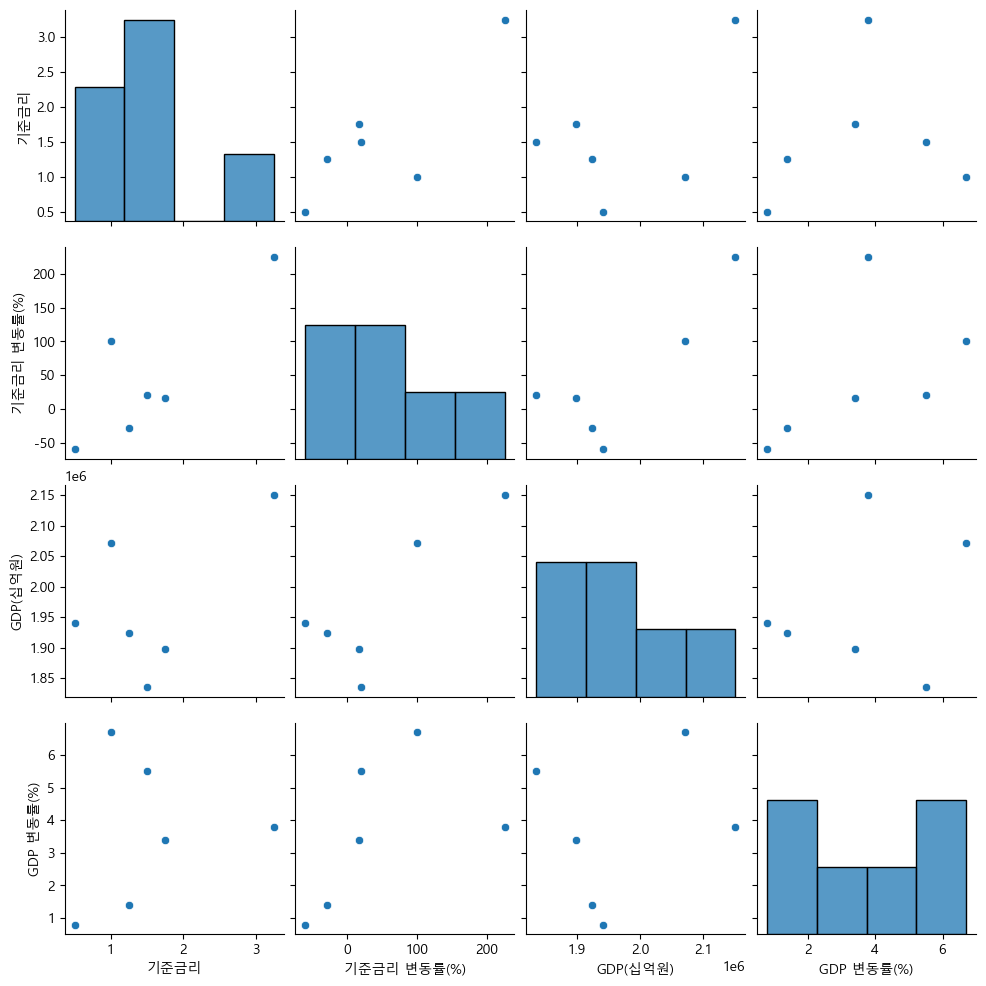

In [115]:
%matplotlib inline
sns.pairplot(seoul_finance)

In [22]:
seoul_apt_price= pd.read_csv("C:\\hojun13\\Pythonwork\\Analysis\\Data\\data\\부동산 파일\\프로젝트\\save_point3_apt_buysell_2018_data.csv", encoding="utf-8")
seoul_apt_price

,자치구별,본번,부번,전용면적(㎡),계약년월,거래금액(만원),1m^2 전용면적당 거래금액(만원),계약연도,계약월
0,강남구,479.0,5.0,94.0,201805.0,153334.0,1702.0,2018.0,5.0
1,강동구,376.0,4.0,78.0,201805.0,64967.0,858.0,2018.0,5.0
2,강북구,768.0,8.0,78.0,201806.0,42267.0,563.0,2018.0,6.0
3,강서구,795.0,6.0,75.0,201805.0,53063.0,728.0,2018.0,5.0
4,관악구,1497.0,11.0,77.0,201805.0,47147.0,642.0,2018.0,5.0
5,광진구,519.0,5.0,87.0,201805.0,80294.0,943.0,2018.0,5.0
6,구로구,526.0,14.0,74.0,201806.0,43341.0,595.0,2018.0,6.0
7,금천구,874.0,4.0,76.0,201806.0,37864.0,516.0,2018.0,6.0
8,노원구,588.0,1.0,66.0,201806.0,38808.0,601.0,2018.0,6.0
9,도봉구,426.0,2.0,72.0,201806.0,35758.0,504.0,2018.0,6.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   자치구별                 25 non-null     object 
 1   본번                   25 non-null     float64
 2   부번                   25 non-null     float64
 3   전용면적(㎡)              25 non-null     float64
 4   계약년월                 25 non-null     float64
 5   거래금액(만원)             25 non-null     float64
 6   1m^2 전용면적당 거래금액(만원)  25 non-null     float64
 7   계약연도                 25 non-null     float64
 8   계약월                  25 non-null     float64
dtypes: float64(8), object(1)
memory usage: 1.9+ KB


<AxesSubplot:xlabel='연도'>

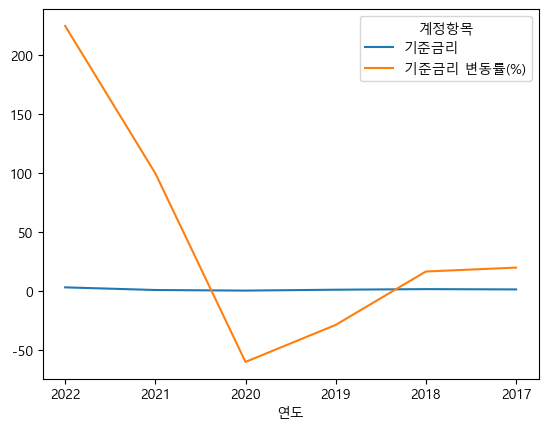

<AxesSubplot:>

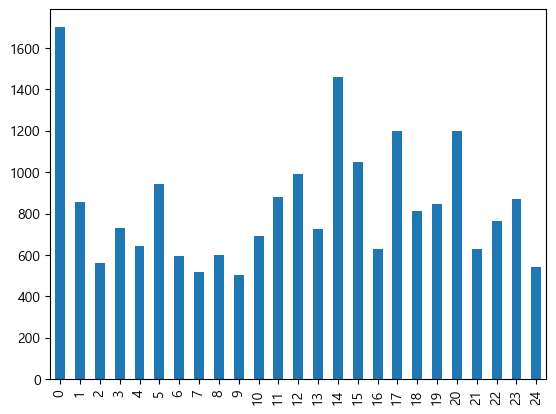

In [32]:
seoul_apt_price['1m^2 전용면적당 거래금액(만원)'].plot(kind="bar")

In [25]:
pd.concat(seoul_rate, seoul_apt_price, axis=1)

C:\Users\acorn\AppData\Local\Temp\ipykernel_42452\152753713.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pd.concat(seoul_rate, seoul_apt_price, axis=1)


TypeError: concat() got multiple values for argument 'axis'